In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def chi2(p,q,r,s,t,u):
    stat = 0
    if p+q != 0:
        stat += (p-q)**2/(p+q)
    if r+s != 0:
        stat += (r-s)**2/(r+s)
    if t+u != 0:
        stat += (t-u)**2/(t+u)
    return stat

In [3]:
def LS(p,q,r,s,t,u): #local sensitivity
    stat = chi2(p,q,r,s,t,u); v = np.zeros(0)
    M = chi2(p,q,r,s,t,u); m = chi2(p,q,r,s,t,u)
    if p >= 1:
        v = [chi2(p-1,q+1,r,s,t,u), chi2(p-1,q,r+1,s,t,u), chi2(p-1,q,r,s+1,t,u), 
             chi2(p-1,q,r,s,t+1,u), chi2(p-1,q,r,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if q >= 1:
        v = [chi2(p+1,q-1,r,s,t,u), chi2(p,q-1,r+1,s,t,u), chi2(p,q-1,r,s+1,t,u), 
             chi2(p,q-1,r,s,t+1,u), chi2(p,q-1,r,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if r >= 1:
        v = [chi2(p+1,q,r-1,s,t,u), chi2(p,q+1,r-1,s,t,u), chi2(p,q,r-1,s+1,t,u), 
             chi2(p,q,r-1,s,t+1,u), chi2(p,q,r-1,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if s >= 1:
        v = [chi2(p+1,q,r,s-1,t,u), chi2(p,q+1,r,s-1,t,u), chi2(p,q,r+1,s-1,t,u), 
             chi2(p,q,r,s-1,t+1,u), chi2(p,q,r,s-1,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if t >= 1:
        v = [chi2(p+1,q,r,s,t-1,u), chi2(p,q+1,r,s,t-1,u), chi2(p,q,r+1,s,t-1,u), 
             chi2(p,q,r,s+1,t-1,u), chi2(p,q,r,s,t-1,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if u >= 1:
        v = [chi2(p+1,q,r,s,t,u-1), chi2(p,q+1,r,s,t,u-1), chi2(p,q,r+1,s,t,u-1), 
             chi2(p,q,r,s+1,t,u-1), chi2(p,q,r,s,t+1,u-1)]
        M = max([max(v),M])
        m = min([min(v),m])
    
    return max([M-stat, stat-m])

In [4]:
def LS_Max(n): #max of local sensitivity = global sensitivity
    m = 0
    for p in range(n+1):
        for q in range(n-p+1):
            for r in range(n-p-q+1):
                for s in range(n-p-q-r+1):
                    for t in range(n-p-q-r-s+1):
                        u = n-p-q-r-s-t
                        if p+q >= r+s and r+s >= t+u and p+r+t >= q+s+u:
                            m = max([LS(p,q,r,s,t,u),m])
    return m

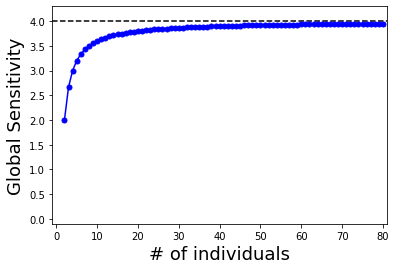

In [5]:
maxLS = np.zeros(79); index = np.zeros(79)

for i in range(79):
    maxLS[i] = LS_Max(i+2)
    index[i] = i+2

fig = plt.figure()
plt.ylim(-0.1, 4.3)
plt.xlim(-1, 81)
plt.hlines(4,-1,81,color="black", linestyle = "dashed")
plt.plot(index, maxLS, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("# of individuals", fontsize = 18)
plt.ylabel("Global Sensitivity", fontsize = 18)
fig.savefig("GS_3*2.png")
fig.savefig("figs/GS_3*2.eps", bbox_inches="tight", pad_inches=0.05)

In [6]:
def LS_min(n): #min of local sensitivity
    m = 4
    for p in range(n+1):
        for q in range(n-p+1):
            for r in range(n-p-q+1):
                for s in range(n-p-q-r+1):
                    for t in range(n-p-q-r-s+1):
                        u = n-p-q-r-s-t
                        if p+q >= r+s and r+s >= t+u and p+r+t >= q+s+u:
                            m = min([LS(p,q,r,s,t,u),m])
    return m

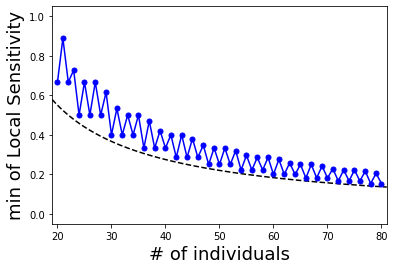

In [7]:
minLS = np.zeros(61); index = np.zeros(61)

for i in range(61):
    minLS[i] = LS_min(i+20)
    index[i] = i+20

fig = plt.figure()
plt.ylim(-0.05, 1.05)
plt.xlim(19, 81)
x = np.arange(19, 81, 0.02)
plt.plot(x,11/x,color="black", linestyle = "dashed")
plt.plot(index, minLS, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("# of individuals", fontsize = 18)
plt.ylabel("min of Local Sensitivity", fontsize = 18)
fig.savefig("minLS_3*2.png")
fig.savefig("figs/minLS_3*2.eps", bbox_inches="tight", pad_inches=0.05)